# Numpy

Used for matrix math, Numpy introduces matrices for python , numpy arrays can only store one type of data such as float to optimise memory

In [400]:
import numpy as np

array = np.arange(20)
array


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [401]:

matrix_1 = np.array([[1, 2], [3, 4]]) # create matrix
matrix_2 = np.array([[1, 2], [3, 4]])
matrix_3 = np.ones((2,2))
matrix_4 = np.zeros((2,2))

matrix_3

array([[1., 1.],
       [1., 1.]])

In [402]:
# dot products of Matrices
matrix_3 @ matrix_1

array([[4., 6.],
       [4., 6.]])

# Scipy

Scipy is an open source libary for scientific computing and engineering. It extends the numpy libary.

Scipy can be divided into subpackages with each one serving a different purpose. 

[Full list here](https://docs.scipy.org/doc/scipy/tutorial/index.html)

[Scipy minimise](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [403]:
from scipy import optimize
import math

# Optimize finds the minimum of any function
# it is a unified interface for finding local minimums of non linear optimization problems

def func1(x):
    return (2*x) + (x * math.sin(x))/math.tan(x) + math.e**(-x)


x_0=-5.0
# Minimise defualts to only positive bounds
optimize.minimize(func1,x_0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.06691553491462221
        x: [-7.754e-01]
      nit: 10
      jac: [-2.980e-08]
 hess_inv: [[ 2.423e-01]]
     nfev: 22
     njev: 11

# Matplotlib

Matplotlib is widely used and you'll see this more often than not. matplotlib is very versitile and is able to interpret data in many ways depending on the graph you want to show, I reccomend visiting the site and exploring it on your own

Matplotlib comes orginally from MATLAB, an old statistical programming language.

[Visit the site](https://matplotlib.org/stable/)

or view the cheatsheet below

<div>
<img src="matplotlib-beginner.webp" width="1000"/>
</div>

A simple line chart for matplotlib, in jupyter:

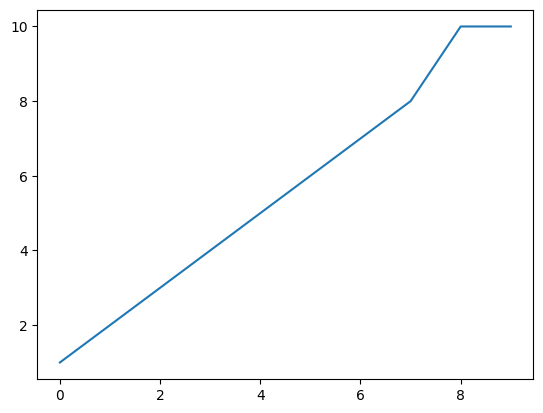

In [404]:
import matplotlib.pyplot as plt

data = [1,2,3,4,5,6,7,8,10,10]
plt.plot(data) # add the data to the plot
plt.show() # show the plot

# Pandas, yfinance and plotly

Pandas is used to manipulate datasets in python. Pandas uses a "dataframe" object which is used to manipulate or handle multiple columns of data. The pandas libary is a tool not a method, its more effective to learn and understand the statistical methods you are going to use than to only learn pandas.

- [Pandas dataframe docs](https://pandas.pydata.org/docs/reference/frame.html)

yfinance is used to gather stock data from yahoo finance.

- [yfinance on pypi](https://pypi.org/project/yfinance/)

Plotly is similar to matplotlib but offers more interactive graphs.

- [Plotly docs](https://plotly.com/python/)

- [Plotly cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)

In [405]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
from math import floor

The dataframe object is tabular, it uses columns and rows to store data and there is a decent crossover between excel and pandas because of this.

In [406]:
# Pandas can interpret different data structures to build a dataframe, dictionaries are the best but lists work too, although you need to pass in `columns=[]` to pd.DataFrame to name them if you use lists.
data = {"Product": ["Apples", "Bananas", "Cherries"], "Price" : [0.7, 2, 3]}
# data = [["Apples",0.7], ["Bananas",2], ["Cherries",3]]

dataframe = pd.DataFrame(data)
dataframe

,Product,Price
0,Apples,0.7
1,Bananas,2.0
2,Cherries,3.0


Pandas automatically assigns the datatype of a column, Columns can only be a single type, this is becuase pandas uses numpy to store the values in a column, use `.info()` to get types, count of rows and memory usage. Dtype is the data type.

The left most column is the index and can be defined by passing in a list to `index=[]` otherwise it starts from 0 and increments for every row.

In [407]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  3 non-null      object 
 1   Price    3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


Data is primarily accessed by columns, not rows, you get specific columns by passing in the column name as a key (like a dictionary) and a series is returned, a series is a single column of data.

In [408]:
dataframe["Price"]
# type(dataframe["Price"])

0    0.7
1    2.0
2    3.0
Name: Price, dtype: float64

You can also acces data by position/index using `.iloc[position]` .

In [409]:
dataframe.iloc[1]

Product    Bananas
Price          2.0
Name: 1, dtype: object

# Pandas and (y)Finance

Now we will build a simple mean reversion strategy.

Use yfinance to get the history of a stock.

yf.download has many arguments you can pass in, if you are veiwing this in vscode you can hold CTRL and hover over `download` to see all of them.

Period will start today and go back in time for the set period, in this case: a year.

You can use any ticker on yfinance, some tickers may have .L or another letter, this is for the different exchanges.

`download` will return a pandas dataframe with the columns `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`

In [410]:

TICKER = "AAPL"
stock_data = yf.download(TICKER,period="1y",repair=True)

# .describe() gives us statistics on the dataset for each column, by removing .describe() jupyter presents the dataframe
stock_data.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,163.434463,165.163506,161.919960,163.630000,163.256820,6.535812e+07
std,18.843923,18.639512,19.067330,18.828847,19.006461,2.129163e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,148.034996,149.989998,146.720001,148.195000,147.583267,5.053360e+07
50%,165.050003,166.320007,164.220001,165.559998,165.108353,6.037850e+07
75%,178.275002,179.985001,177.090004,178.500000,178.499405,7.478095e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


We can veiw the price stock history with plotly.

Since we only have daily prices the resolution is not great, so dont zoom too far in.

In [411]:
fig = go.Figure()

# Graph
fig.add_trace(go.Scatter(x=stock_data.index.format(""),y=stock_data["Adj Close"], name=TICKER))

# Buttons
fig.update_layout(title=f"Stock price of {TICKER}", xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),type="category",tickformat = "%d, %Y", dtick = 100
    ))

fig.show()

We only need `Adj Close` for our next sections 

In [412]:
# Use "Adj Close" over "Close" as Adj takes into account stock splits and dividends, we dont need the other columns.
stock_data = stock_data["Adj Close"].to_frame() # use .to_frame() otherwise a Series is returned

Pandas has many methods that can be applied directly to the dataframe, one of those is .pct_change() which gets the change between each datapoint, in our case it is the share price movement. See pandas docs for more

In [413]:
print(stock_data.pct_change()) # share price movement
print("\n--- .std()\n")
print(stock_data.std()) # standard deviation of each column
print("\n--- .mean()\n")
print(stock_data.mean()) # mean of each colmn

            Adj Close
Date                 
2022-10-18        NaN
2022-10-19   0.000765
2022-10-20  -0.003267
2022-10-21   0.027059
2022-10-24   0.014803
...               ...
2023-10-11   0.007904
2023-10-12   0.005061
2023-10-13  -0.010293
2023-10-16  -0.000727
2023-10-17  -0.008785

[251 rows x 1 columns]

--- .std()

Adj Close    19.006461
dtype: float64

--- .mean()

Adj Close    163.25682
dtype: float64


or we can find the moving average by using `.rolling(periods)` which creates a moving window for applying `.mean()` or the other methods

In [414]:
rolling = stock_data.rolling(5)
print(rolling)
# for i in rolling: # Rolling is a similar to range(), to view it fully iterate over it or pass it into list()
    # print(i)

rolling_mean = rolling.mean()

Rolling [window=5,center=False,axis=0,method=single]


In [415]:
stock_data["rolling mean"] = rolling_mean

fig = go.Figure()
fig.add_trace(go.Line(x=stock_data.index,y=stock_data["Adj Close"], name=TICKER))
fig.add_trace(go.Line(x=stock_data.index,y=stock_data["rolling mean"], name = "Rolling mean"))

fig.update_layout(title=f"Stock price of {TICKER}", xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),type="category",tickformat = "%b %d, %Y", dtick = 100
    ))

fig.show()

c:\Users\olive\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Mean reversion strategies rely on the fact that the stock price should always return to the mean at some point, If we buy below the mean and sell above the mean we can hope to make profit, the further the stock price moves from the mean the more likely you are to take a profit as it is more likely to go back. However we cant do this every time it drops below otherwise we will incur trading fees larger than the stock movement so the differnece has to be large enough but the larger the difference the less likely it is to occur as stock price movements are normally distributed.

To create the bands that to trade at create two new columns called `"high"` and `"low"`. This is done by assignment like its a dictionary.

```python
new_dict["test"] = 60 * 1.02
```

Our high and low bands will be defined as a percentage of the rolling mean. Pandas applies the math to all rows so you dont need to iterate over the rows.

In [416]:
stock_data["high"] = stock_data["rolling mean"] * 1.02
stock_data["low"] = stock_data["rolling mean"] * 0.98
stock_data

,Adj Close,rolling mean,high,low
Date,,,,
2022-10-18,142.902252,NaN,NaN,NaN
2022-10-19,143.011597,NaN,NaN,NaN
2022-10-20,142.544388,NaN,NaN,NaN
2022-10-21,146.401505,NaN,NaN,NaN
2022-10-24,148.568619,144.685672,147.579385,141.791959
...,...,...,...,...
2023-10-11,179.800003,177.916003,181.474323,174.357683
2023-10-12,180.710007,179.076004,182.657524,175.494484
2023-10-13,178.850006,179.348004,182.934964,175.761044


In [417]:

fig = go.Figure()

fig.add_trace(go.Line(x=stock_data.index,y=stock_data["Adj Close"], name=TICKER))
fig.add_trace(go.Line(x=stock_data.index,y=stock_data["rolling mean"], name="mean"))
fig.add_trace(go.Line(x=stock_data.index,y=stock_data["high"], name="high"))
fig.add_trace(go.Line(x=stock_data.index,y=stock_data["low"],name="low"))

fig.update_layout(title=f"Stock price of {TICKER}", xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),type="category",tickformat = "%b %d, %Y", dtick = 100
    ))

fig.show()


c:\Users\olive\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Pandas can also apply comparisons to all the rows at once, if you are using comparisons a series of True and False will be returned where the values meet the conditions

you can then use `.loc[]` to filter out the positions using the previously created series as a filter 

The code below finds all the possible buy and sell opportunities based on our parameters

In [418]:
filt = stock_data["rolling mean"] <= stock_data["high"]
buys = stock_data.loc[filt]

filt = stock_data["rolling mean"] >= stock_data["low"]
sells = stock_data.loc[filt]

buys

,Adj Close,rolling mean,high,low
Date,,,,
2022-10-24,148.568619,144.685672,147.579385,141.791959
2022-10-25,151.441589,146.393539,149.321410,143.465669
2022-10-26,148.469223,147.485065,150.434766,144.535363
2022-10-27,143.946045,147.765396,150.720704,144.810088
2022-10-28,154.821564,149.449408,152.438396,146.460420
...,...,...,...,...
2023-10-11,179.800003,177.916003,181.474323,174.357683
2023-10-12,180.710007,179.076004,182.657524,175.494484
2023-10-13,178.850006,179.348004,182.934964,175.761044


Now we need to back test our strategy to see if it works. First declare the variables we need to track

In [419]:
start_balance = 1_000
balance = start_balance

position = 0        # Tracks the shares owned
trades = 0          # Tracks trades closed
trading_fee = 0.001   # Fee for trading is a flat percentage of the price, this increases the price when buying and decreases our selling price

verbose = False     # Print when a postion is opened and closed

Next iterate over the rows entering and exiting postions based on the high and low bands we previously created.

In [420]:

for index, row in stock_data.iterrows():
    # skip over rows which dont have a mean
    if pd.isnull(row["rolling mean"]):
        continue

    # if we have a position open, close it if the price is below low band
    if position:
        if row["Adj Close"] >= row["low"]:

            balance += position * row["Adj Close"] * (1 - trading_fee)  # Sell the position
            trades += position
            position = 0

            if verbose:
                print(f"position Closed at {index} for {row['Adj Close']}")

    # If we are not in a position, open a postition only if the price is above high band
    elif not position:
        if row["Adj Close"] <= row["high"]:
            # Check if we have enough cash to enter a position
            if balance >= row["Adj Close"]:
                # amount of shares we can buy, no fractional shares so use math.floor
                buy_shares = floor(balance / row["Adj Close"])
                # buy_shares = 1 # set to only buy one share

                # calculate the risk management and hedge
                # There is no hedging or risk management in this example, we just go all in everytime we see a signal

                if buy_shares > 100:
                    trading_fee = 0.1
                # Purchase the assets using all our cash
                balance -= buy_shares * row["Adj Close"] * (1 + trading_fee)
                position += buy_shares

                if verbose:
                    print(f"position Opened at {index} for {row['Adj Close']}")

# Force close the position at end
if position:
    balance += position * row["Adj Close"] * (1 - trading_fee) # Sell the stock
    trades += position
    position = 0


# output the results of trading
profit = balance - start_balance
returns = (profit / start_balance) * 100

print(f"Closing Balance          :  {round(balance,2):,}")
print(f"Return                   :  {round(returns,2)}%")
print(f"shares traded            :  {trades}")
print(f"average profit per trade :  {profit/trades}")

Closing Balance          :  924.75
Return                   :  -7.52%
shares traded            :  598
average profit per trade :  -0.12583321617915486


In [421]:
stock_data.to_csv("stock data")

ValueError: No engine for filetype: ''